**Alumno:** César Emilio García Ávalos

**Actividad:** M4_AI1_Análisis Factorial

In [26]:
library(readr)
library(tidyr)
library(dplyr)
library(MASS)
library(caret)
library(randomForest)

ruta <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/4.3_AD_ejercicio.csv"
datos <- read.csv(ruta, sep = ";")
summary(datos)

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

In [27]:
head(datos, 5)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [28]:
datos <- mutate(datos, quality = case_when(
    quality %in% c(3, 4) ~ "pobre",
    quality %in% c(5, 6) ~ "aceptable",
    quality %in% c(7, 8) ~ "bueno"
  ))
datos$quality <- factor(datos$quality, levels = c("pobre", "aceptable", "bueno"))

In [29]:
# Calcular los máximos y mínimos de cada columna
maxs <- apply(datos[,1:11], 2, max)
mins <- apply(datos[,1:11], 2, min)

# Normalizar el dataset al rango de 0 a 1
dataset <- as.data.frame(scale(datos[,1:11], center = mins, scale = maxs - mins))

# Agregar la columna 'quality' al dataset normalizado
dataset <- cbind(dataset, quality = datos$quality)

In [30]:
index <- sample(1:nrow(dataset), round(nrow(dataset)*0.7),replace=FALSE)
x_train <- dataset[index,]
test <- dataset[-index,]

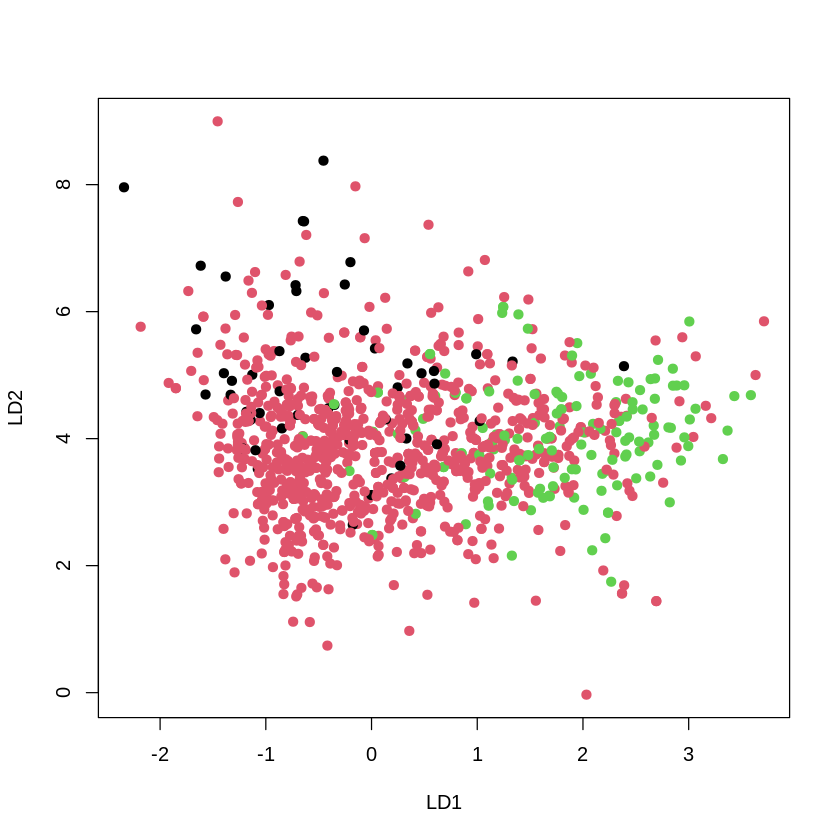

In [31]:
set.seed(12345)
model <- lda(quality ~ ., data=x_train)
projected_data <- as.matrix(x_train[,1:11]) %*% model$scaling
plot(projected_data, col = x_train[,12], pch=19)

In [32]:
x_test <- test[, !(names(test) %in% c("quality"))]
model.results <- predict(model, x_test)

In [33]:
t <- table(model.results$class, test$quality)
print(confusionMatrix(t))

Confusion Matrix and Statistics

           
            pobre aceptable bueno
  pobre         2         7     0
  aceptable    10       370    38
  bueno         1        20    32

Overall Statistics
                                          
               Accuracy : 0.8417          
                 95% CI : (0.8059, 0.8732)
    No Information Rate : 0.8271          
    P-Value [Acc > NIR] : 0.2179          
                                          
                  Kappa : 0.3983          
                                          
 Mcnemar's Test P-Value : 0.0683          

Statistics by Class:

                     Class: pobre Class: aceptable Class: bueno
Sensitivity              0.153846           0.9320      0.45714
Specificity              0.985011           0.4217      0.94878
Pos Pred Value           0.222222           0.8852      0.60377
Neg Pred Value           0.976645           0.5645      0.91101
Prevalence               0.027083           0.8271      0.14583
Detec

In [36]:
new_x_train <- as.matrix(x_train[,1:11]) %*% model$scaling
new_x_train <- as.data.frame(new_x_train)
new_x_train$class <- x_train$class
head(new_x_train)

,LD1,LD2
,<dbl>,<dbl>
142,-0.5421487,4.309116
51,-0.3737467,4.287820
720,-1.0544402,4.273608
730,0.5639612,5.981774
1244,-0.7836617,3.136396
664,1.5782694,2.561829
